In [6]:
pip install tensorflow==2.4.1

Note: you may need to restart the kernel to use updated packages.


In [7]:
import tensorflow as tf
print(tf.__version__)

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
2.4.1


# The Keras functional API

 ## Coding tutorials
 #### [1. Multiple inputs and outputs](#coding_tutorial_1)
 #### [2. Tensors and Variables](#coding_tutorial_2)
 #### [3. Accessing model layers](#coding_tutorial_3)
 #### [4. Freezing layers](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Multiple inputs and outputs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the acute inflammations dataset

The `acute inflammations` was created by a medical expert as a data set to test the expert system, which will perform the presumptive diagnosis of two diseases of the urinary system. You can find out more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations).

Attribute information:

Inputs:
- Temperature of patient : 35C-42C
- Occurrence of nausea : yes/no
- Lumbar pain : yes/no
- Urine pushing (continuous need for urination) : yes/no
- Micturition pains : yes/no
- Burning of urethra, itch, swelling of urethra outlet : yes/no

Outputs:
- decision 1: Inflammation of urinary bladder : yes/no
- decision 2: Nephritis of renal pelvis origin : yes/no

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1CDPQSqpI7OjNIgOERWaI-BlQMI6vjzb9

You should store this file in Drive for use in this Colab notebook.

#### Load the data

In [3]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [3]:
# Load the dataset

from sklearn.model_selection import train_test_split
import os

datapath = os.path.join('.', 'datasets', 'diagnosis.csv')

pd_dat = pd.read_csv(datapath)
dataset = pd_dat.values

In [4]:
# Build train and test data splits

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,:6], dataset[:,6:], test_size=0.33)


In [5]:
# Assign training and testing inputs/outputs

temp_train, nocc_train, lumbp_train, up_train, mict_train, bis_train = np.transpose(X_train)
temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test = np.transpose(X_test)

inflam_train, nephr_train = Y_train[:, 0], Y_train[:, 1]
inflam_test, nephr_test = Y_test[:, 0], Y_test[:, 1]

In [6]:
# Print out the inputs/outputs

print(X_train), print(Y_train)

[[40.9  1.   1.   1.   1.   0. ]
 [38.5  0.   1.   1.   0.   1. ]
 [40.6  0.   0.   0.   0.   0. ]
 [37.3  0.   1.   0.   0.   0. ]
 [41.2  0.   1.   1.   0.   1. ]
 [37.3  0.   0.   1.   1.   1. ]
 [36.6  0.   1.   0.   0.   0. ]
 [37.   0.   0.   1.   1.   1. ]
 [37.9  0.   0.   1.   0.   0. ]
 [36.9  0.   0.   1.   1.   1. ]
 [41.   0.   1.   1.   0.   1. ]
 [40.4  1.   1.   1.   1.   0. ]
 [40.2  1.   1.   1.   1.   1. ]
 [41.   1.   1.   1.   1.   1. ]
 [36.6  0.   0.   1.   1.   1. ]
 [38.3  0.   1.   1.   0.   1. ]
 [36.3  0.   0.   1.   1.   1. ]
 [37.   0.   0.   1.   1.   0. ]
 [41.2  1.   1.   0.   1.   0. ]
 [37.7  0.   0.   1.   1.   0. ]
 [37.5  0.   1.   0.   0.   0. ]
 [37.2  0.   1.   0.   0.   0. ]
 [41.3  1.   1.   1.   1.   0. ]
 [40.   0.   0.   0.   0.   0. ]
 [36.2  0.   0.   1.   1.   1. ]
 [38.9  0.   1.   1.   0.   1. ]
 [37.2  0.   0.   1.   0.   0. ]
 [37.9  0.   0.   1.   1.   0. ]
 [40.2  1.   1.   0.   1.   0. ]
 [40.9  0.   1.   1.   0.   1. ]
 [40.7  1.

(None, None)

#### Build the model

In [7]:
# Build the input layers

from tensorflow.keras import layers, Input

shape_inputs = (1,)

temperature = Input(shape = shape_inputs, name = 'temp')
nausea_occurence = Input(shape = shape_inputs, name = 'nocc')
lumbar_pain = Input(shape = shape_inputs, name = 'lumbp')
urine_pushing = Input(shape = shape_inputs, name = 'up')
micturition_pains = Input(shape = shape_inputs, name = 'mict')
bis = Input(shape = shape_inputs, name = 'bis')

In [8]:
# Create a list of all the inputs

list_inputs = [temperature, nausea_occurence, lumbar_pain, urine_pushing, 
               micturition_pains, bis]

In [9]:
# Merge all input features into a single large vector

x = layers.concatenate(list_inputs)
x

<tf.Tensor 'concatenate/Identity:0' shape=(None, 6) dtype=float32>

In [10]:
# Use a logistic regression classifier for disease prediction

inflammation_pred = layers.Dense(1, activation = 'sigmoid', name = 'inflammed')(x)
nephritis_pred = layers.Dense(1, activation = 'sigmoid', name = 'nephr')(x)

In [11]:
# Create a list of all the outputs

list_outputs = [inflammation_pred, nephritis_pred]

# No need to concatenate list_outputs.

In [12]:
# Create the model object

model = tf.keras.Model(inputs = list_inputs, outputs = list_outputs)

#### Plot the model

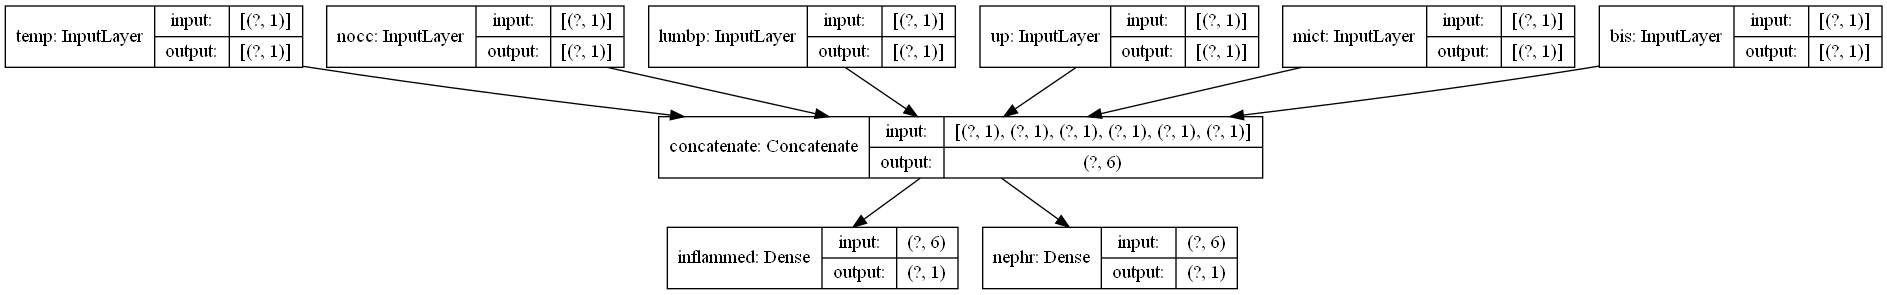

In [13]:
# Display the multiple input/output model

tf.keras.utils.plot_model(model, "multiIO.png", show_shapes = True)

#### Compile the model

In [14]:
# Compile the model

model.compile(optimizer = tf.keras.optimizers.RMSprop(1e-3),
             loss = {'inflammed': 'binary_crossentropy',
                    'nephr': 'binary_crossentropy'},
             metrics = {'inflammed': ['acc'],
                       'nephr': ['acc']},
             loss_weights = [1.0,
                            1.])

#### Fit the model 

In [15]:
# Define training inputs and outputs

inputs_train = {'temp': temp_train, 'nocc': nocc_train, 'lumbp': lumbp_train,
                'up': up_train, 'mict': mict_train, 'bis': bis_train}

outputs_train = {'inflammed': inflam_train, 'nephr': nephr_train}

In [16]:
# Train the model

history = model.fit(inputs_train,
                   outputs_train,
                   epochs = 1000,
                   batch_size = 128)

Train on 80 samples
Epoch 1/1000
80/80 [==============================] - 1s 14ms/sample - loss: 26.9277 - inflammed_loss: 9.6657 - nephr_loss: 17.2619 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 2/1000
80/80 [==============================] - 0s 50us/sample - loss: 26.7933 - inflammed_loss: 9.5987 - nephr_loss: 17.1946 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 3/1000
80/80 [==============================] - 0s 62us/sample - loss: 26.6958 - inflammed_loss: 9.5501 - nephr_loss: 17.1457 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 4/1000
80/80 [==============================] - 0s 50us/sample - loss: 26.6141 - inflammed_loss: 9.5093 - nephr_loss: 17.1048 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 5/1000
80/80 [==============================] - 0s 50us/sample - loss: 26.5416 - inflammed_loss: 9.4732 - nephr_loss: 17.0684 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 6/1000
80/80 [==============================] - 0s 37us/sample - loss: 26.4752 - inflammed_los

Epoch 48/1000
80/80 [==============================] - 0s 37us/sample - loss: 24.5428 - inflammed_loss: 8.4762 - nephr_loss: 16.0666 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 49/1000
80/80 [==============================] - 0s 62us/sample - loss: 24.5002 - inflammed_loss: 8.4549 - nephr_loss: 16.0452 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 50/1000
80/80 [==============================] - 0s 75us/sample - loss: 24.4575 - inflammed_loss: 8.4337 - nephr_loss: 16.0238 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 51/1000
80/80 [==============================] - 0s 87us/sample - loss: 24.4149 - inflammed_loss: 8.4124 - nephr_loss: 16.0025 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 52/1000
80/80 [==============================] - 0s 62us/sample - loss: 24.3723 - inflammed_loss: 8.3912 - nephr_loss: 15.9811 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 53/1000
80/80 [==============================] - 0s 50us/sample - loss: 24.3297 - inflammed_loss: 8.3699 - ne

Epoch 95/1000
80/80 [==============================] - 0s 50us/sample - loss: 22.5438 - inflammed_loss: 7.4791 - nephr_loss: 15.0646 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 96/1000
80/80 [==============================] - 0s 50us/sample - loss: 22.5013 - inflammed_loss: 7.4579 - nephr_loss: 15.0433 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 97/1000
80/80 [==============================] - 0s 62us/sample - loss: 22.4588 - inflammed_loss: 7.4367 - nephr_loss: 15.0220 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 98/1000
80/80 [==============================] - 0s 62us/sample - loss: 22.4163 - inflammed_loss: 7.4155 - nephr_loss: 15.0007 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 99/1000
80/80 [==============================] - 0s 50us/sample - loss: 22.3738 - inflammed_loss: 7.3943 - nephr_loss: 14.9794 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 100/1000
80/80 [==============================] - 0s 100us/sample - loss: 22.3313 - inflammed_loss: 7.3731 - 

Epoch 142/1000
80/80 [==============================] - 0s 62us/sample - loss: 20.5461 - inflammed_loss: 6.4827 - nephr_loss: 14.0634 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 143/1000
80/80 [==============================] - 0s 62us/sample - loss: 20.5036 - inflammed_loss: 6.4615 - nephr_loss: 14.0421 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 144/1000
80/80 [==============================] - 0s 62us/sample - loss: 20.4611 - inflammed_loss: 6.4403 - nephr_loss: 14.0208 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 145/1000
80/80 [==============================] - 0s 75us/sample - loss: 20.4186 - inflammed_loss: 6.4191 - nephr_loss: 13.9995 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 146/1000
80/80 [==============================] - 0s 50us/sample - loss: 20.3761 - inflammed_loss: 6.3980 - nephr_loss: 13.9782 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 147/1000
80/80 [==============================] - 0s 50us/sample - loss: 20.3336 - inflammed_loss: 6.376

Epoch 189/1000
80/80 [==============================] - 0s 50us/sample - loss: 18.5485 - inflammed_loss: 5.4864 - nephr_loss: 13.0621 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 190/1000
80/80 [==============================] - 0s 50us/sample - loss: 18.5060 - inflammed_loss: 5.4652 - nephr_loss: 13.0408 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 191/1000
80/80 [==============================] - 0s 50us/sample - loss: 18.4635 - inflammed_loss: 5.4440 - nephr_loss: 13.0195 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 192/1000
80/80 [==============================] - 0s 50us/sample - loss: 18.4210 - inflammed_loss: 5.4228 - nephr_loss: 12.9982 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 193/1000
80/80 [==============================] - 0s 50us/sample - loss: 18.3785 - inflammed_loss: 5.4016 - nephr_loss: 12.9769 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 194/1000
80/80 [==============================] - 0s 62us/sample - loss: 18.3360 - inflammed_loss: 5.380

Epoch 236/1000
80/80 [==============================] - 0s 62us/sample - loss: 16.5510 - inflammed_loss: 4.4902 - nephr_loss: 12.0608 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 237/1000
80/80 [==============================] - 0s 37us/sample - loss: 16.5085 - inflammed_loss: 4.4690 - nephr_loss: 12.0395 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 238/1000
80/80 [==============================] - 0s 37us/sample - loss: 16.4660 - inflammed_loss: 4.4478 - nephr_loss: 12.0182 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 239/1000
80/80 [==============================] - 0s 37us/sample - loss: 16.4235 - inflammed_loss: 4.4266 - nephr_loss: 11.9969 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 240/1000
80/80 [==============================] - 0s 50us/sample - loss: 16.3810 - inflammed_loss: 4.4054 - nephr_loss: 11.9756 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 241/1000
80/80 [==============================] - 0s 37us/sample - loss: 16.3385 - inflammed_loss: 4.384

Epoch 283/1000
80/80 [==============================] - 0s 362us/sample - loss: 14.5546 - inflammed_loss: 3.4950 - nephr_loss: 11.0596 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 284/1000
80/80 [==============================] - 0s 75us/sample - loss: 14.5122 - inflammed_loss: 3.4739 - nephr_loss: 11.0383 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 285/1000
80/80 [==============================] - 0s 37us/sample - loss: 14.4697 - inflammed_loss: 3.4528 - nephr_loss: 11.0170 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 286/1000
80/80 [==============================] - 0s 50us/sample - loss: 14.4273 - inflammed_loss: 3.4316 - nephr_loss: 10.9957 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 287/1000
80/80 [==============================] - 0s 50us/sample - loss: 14.3849 - inflammed_loss: 3.4105 - nephr_loss: 10.9744 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 288/1000
80/80 [==============================] - 0s 37us/sample - loss: 14.3424 - inflammed_loss: 3.38

Epoch 330/1000
80/80 [==============================] - 0s 62us/sample - loss: 12.5660 - inflammed_loss: 2.5076 - nephr_loss: 10.0583 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 331/1000
80/80 [==============================] - 0s 62us/sample - loss: 12.5239 - inflammed_loss: 2.4869 - nephr_loss: 10.0370 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 332/1000
80/80 [==============================] - 0s 87us/sample - loss: 12.4819 - inflammed_loss: 2.4662 - nephr_loss: 10.0157 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 333/1000
80/80 [==============================] - 0s 87us/sample - loss: 12.4398 - inflammed_loss: 2.4454 - nephr_loss: 9.9944 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 334/1000
80/80 [==============================] - 0s 50us/sample - loss: 12.3978 - inflammed_loss: 2.4247 - nephr_loss: 9.9731 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 335/1000
80/80 [==============================] - 0s 37us/sample - loss: 12.3559 - inflammed_loss: 2.4041 

Epoch 377/1000
80/80 [==============================] - 0s 37us/sample - loss: 10.6295 - inflammed_loss: 1.5725 - nephr_loss: 9.0570 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 378/1000
80/80 [==============================] - 0s 37us/sample - loss: 10.5899 - inflammed_loss: 1.5542 - nephr_loss: 9.0357 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 379/1000
80/80 [==============================] - 0s 62us/sample - loss: 10.5504 - inflammed_loss: 1.5360 - nephr_loss: 9.0144 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 380/1000
80/80 [==============================] - 0s 50us/sample - loss: 10.5111 - inflammed_loss: 1.5179 - nephr_loss: 8.9931 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 381/1000
80/80 [==============================] - 0s 37us/sample - loss: 10.4718 - inflammed_loss: 1.5000 - nephr_loss: 8.9718 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 382/1000
80/80 [==============================] - 0s 50us/sample - loss: 10.4327 - inflammed_loss: 1.4822 - n

Epoch 424/1000
80/80 [==============================] - 0s 62us/sample - loss: 8.9546 - inflammed_loss: 0.8988 - nephr_loss: 8.0558 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 425/1000
80/80 [==============================] - 0s 87us/sample - loss: 8.9244 - inflammed_loss: 0.8899 - nephr_loss: 8.0345 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 426/1000
80/80 [==============================] - 0s 50us/sample - loss: 8.8946 - inflammed_loss: 0.8814 - nephr_loss: 8.0132 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 427/1000
80/80 [==============================] - 0s 50us/sample - loss: 8.8650 - inflammed_loss: 0.8731 - nephr_loss: 7.9919 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 428/1000
80/80 [==============================] - 0s 50us/sample - loss: 8.8356 - inflammed_loss: 0.8651 - nephr_loss: 7.9706 - inflammed_acc: 0.5000 - nephr_acc: 0.5250
Epoch 429/1000
80/80 [==============================] - 0s 50us/sample - loss: 8.8066 - inflammed_loss: 0.8573 - nephr_l

Epoch 471/1000
80/80 [==============================] - 0s 50us/sample - loss: 7.7751 - inflammed_loss: 0.7206 - nephr_loss: 7.0545 - inflammed_acc: 0.4375 - nephr_acc: 0.5250
Epoch 472/1000
80/80 [==============================] - 0s 37us/sample - loss: 7.7532 - inflammed_loss: 0.7199 - nephr_loss: 7.0332 - inflammed_acc: 0.4375 - nephr_acc: 0.5250
Epoch 473/1000
80/80 [==============================] - 0s 62us/sample - loss: 7.7312 - inflammed_loss: 0.7193 - nephr_loss: 7.0119 - inflammed_acc: 0.4375 - nephr_acc: 0.5250
Epoch 474/1000
80/80 [==============================] - 0s 62us/sample - loss: 7.7093 - inflammed_loss: 0.7187 - nephr_loss: 6.9906 - inflammed_acc: 0.4375 - nephr_acc: 0.5250
Epoch 475/1000
80/80 [==============================] - 0s 50us/sample - loss: 7.6874 - inflammed_loss: 0.7181 - nephr_loss: 6.9693 - inflammed_acc: 0.4375 - nephr_acc: 0.5250
Epoch 476/1000
80/80 [==============================] - 0s 50us/sample - loss: 7.6656 - inflammed_loss: 0.7176 - nephr_l

Epoch 518/1000
80/80 [==============================] - 0s 50us/sample - loss: 6.7490 - inflammed_loss: 0.6957 - nephr_loss: 6.0533 - inflammed_acc: 0.4375 - nephr_acc: 0.5250
Epoch 519/1000
80/80 [==============================] - 0s 37us/sample - loss: 6.7272 - inflammed_loss: 0.6952 - nephr_loss: 6.0320 - inflammed_acc: 0.4375 - nephr_acc: 0.5250
Epoch 520/1000
80/80 [==============================] - 0s 37us/sample - loss: 6.7054 - inflammed_loss: 0.6947 - nephr_loss: 6.0107 - inflammed_acc: 0.4375 - nephr_acc: 0.5250
Epoch 521/1000
80/80 [==============================] - 0s 50us/sample - loss: 6.6836 - inflammed_loss: 0.6942 - nephr_loss: 5.9893 - inflammed_acc: 0.4375 - nephr_acc: 0.5250
Epoch 522/1000
80/80 [==============================] - 0s 37us/sample - loss: 6.6618 - inflammed_loss: 0.6937 - nephr_loss: 5.9680 - inflammed_acc: 0.4375 - nephr_acc: 0.5250
Epoch 523/1000
80/80 [==============================] - 0s 62us/sample - loss: 6.6399 - inflammed_loss: 0.6932 - nephr_l

Epoch 565/1000
80/80 [==============================] - 0s 50us/sample - loss: 5.7243 - inflammed_loss: 0.6723 - nephr_loss: 5.0520 - inflammed_acc: 0.5375 - nephr_acc: 0.5250
Epoch 566/1000
80/80 [==============================] - 0s 63us/sample - loss: 5.7025 - inflammed_loss: 0.6718 - nephr_loss: 5.0307 - inflammed_acc: 0.5375 - nephr_acc: 0.5250
Epoch 567/1000
80/80 [==============================] - 0s 62us/sample - loss: 5.6807 - inflammed_loss: 0.6713 - nephr_loss: 5.0094 - inflammed_acc: 0.5375 - nephr_acc: 0.5250
Epoch 568/1000
80/80 [==============================] - 0s 50us/sample - loss: 5.6589 - inflammed_loss: 0.6708 - nephr_loss: 4.9881 - inflammed_acc: 0.5375 - nephr_acc: 0.5250
Epoch 569/1000
80/80 [==============================] - 0s 75us/sample - loss: 5.6371 - inflammed_loss: 0.6703 - nephr_loss: 4.9668 - inflammed_acc: 0.5375 - nephr_acc: 0.5250
Epoch 570/1000
80/80 [==============================] - 0s 37us/sample - loss: 5.6154 - inflammed_loss: 0.6698 - nephr_l

Epoch 612/1000
80/80 [==============================] - 0s 62us/sample - loss: 4.7006 - inflammed_loss: 0.6496 - nephr_loss: 4.0510 - inflammed_acc: 0.5375 - nephr_acc: 0.5250
Epoch 613/1000
80/80 [==============================] - 0s 37us/sample - loss: 4.6789 - inflammed_loss: 0.6491 - nephr_loss: 4.0297 - inflammed_acc: 0.5375 - nephr_acc: 0.5250
Epoch 614/1000
80/80 [==============================] - 0s 37us/sample - loss: 4.6571 - inflammed_loss: 0.6487 - nephr_loss: 4.0084 - inflammed_acc: 0.5375 - nephr_acc: 0.5250
Epoch 615/1000
80/80 [==============================] - 0s 50us/sample - loss: 4.6354 - inflammed_loss: 0.6482 - nephr_loss: 3.9872 - inflammed_acc: 0.5375 - nephr_acc: 0.5250
Epoch 616/1000
80/80 [==============================] - 0s 50us/sample - loss: 4.6136 - inflammed_loss: 0.6477 - nephr_loss: 3.9659 - inflammed_acc: 0.5375 - nephr_acc: 0.5250
Epoch 617/1000
80/80 [==============================] - 0s 62us/sample - loss: 4.5918 - inflammed_loss: 0.6473 - nephr_l

Epoch 659/1000
80/80 [==============================] - 0s 25us/sample - loss: 3.6795 - inflammed_loss: 0.6276 - nephr_loss: 3.0518 - inflammed_acc: 0.5375 - nephr_acc: 0.5250
Epoch 660/1000
80/80 [==============================] - 0s 37us/sample - loss: 3.6578 - inflammed_loss: 0.6272 - nephr_loss: 3.0306 - inflammed_acc: 0.7000 - nephr_acc: 0.5250
Epoch 661/1000
80/80 [==============================] - 0s 62us/sample - loss: 3.6361 - inflammed_loss: 0.6267 - nephr_loss: 3.0094 - inflammed_acc: 0.5375 - nephr_acc: 0.5250
Epoch 662/1000
80/80 [==============================] - 0s 37us/sample - loss: 3.6145 - inflammed_loss: 0.6262 - nephr_loss: 2.9883 - inflammed_acc: 0.7000 - nephr_acc: 0.5250
Epoch 663/1000
80/80 [==============================] - 0s 50us/sample - loss: 3.5928 - inflammed_loss: 0.6258 - nephr_loss: 2.9671 - inflammed_acc: 0.5375 - nephr_acc: 0.5250
Epoch 664/1000
80/80 [==============================] - 0s 50us/sample - loss: 3.5712 - inflammed_loss: 0.6253 - nephr_l

Epoch 706/1000
80/80 [==============================] - 0s 50us/sample - loss: 2.6727 - inflammed_loss: 0.6062 - nephr_loss: 2.0664 - inflammed_acc: 0.7875 - nephr_acc: 0.5250
Epoch 707/1000
80/80 [==============================] - 0s 37us/sample - loss: 2.6517 - inflammed_loss: 0.6058 - nephr_loss: 2.0459 - inflammed_acc: 0.7000 - nephr_acc: 0.5250
Epoch 708/1000
80/80 [==============================] - 0s 62us/sample - loss: 2.6308 - inflammed_loss: 0.6054 - nephr_loss: 2.0255 - inflammed_acc: 0.7875 - nephr_acc: 0.5250
Epoch 709/1000
80/80 [==============================] - 0s 50us/sample - loss: 2.6099 - inflammed_loss: 0.6049 - nephr_loss: 2.0050 - inflammed_acc: 0.7000 - nephr_acc: 0.5250
Epoch 710/1000
80/80 [==============================] - 0s 62us/sample - loss: 2.5891 - inflammed_loss: 0.6045 - nephr_loss: 1.9846 - inflammed_acc: 0.7875 - nephr_acc: 0.5250
Epoch 711/1000
80/80 [==============================] - 0s 50us/sample - loss: 2.5683 - inflammed_loss: 0.6040 - nephr_l

Epoch 753/1000
80/80 [==============================] - 0s 50us/sample - loss: 1.7585 - inflammed_loss: 0.5855 - nephr_loss: 1.1730 - inflammed_acc: 0.7875 - nephr_acc: 0.5250
Epoch 754/1000
80/80 [==============================] - 0s 50us/sample - loss: 1.7417 - inflammed_loss: 0.5851 - nephr_loss: 1.1566 - inflammed_acc: 0.7875 - nephr_acc: 0.5250
Epoch 755/1000
80/80 [==============================] - 0s 100us/sample - loss: 1.7250 - inflammed_loss: 0.5846 - nephr_loss: 1.1404 - inflammed_acc: 0.7875 - nephr_acc: 0.5250
Epoch 756/1000
80/80 [==============================] - 0s 62us/sample - loss: 1.7085 - inflammed_loss: 0.5842 - nephr_loss: 1.1243 - inflammed_acc: 0.7875 - nephr_acc: 0.5250
Epoch 757/1000
80/80 [==============================] - 0s 50us/sample - loss: 1.6921 - inflammed_loss: 0.5838 - nephr_loss: 1.1084 - inflammed_acc: 0.7875 - nephr_acc: 0.5250
Epoch 758/1000
80/80 [==============================] - 0s 100us/sample - loss: 1.6760 - inflammed_loss: 0.5833 - nephr

Epoch 800/1000
80/80 [==============================] - 0s 62us/sample - loss: 1.1936 - inflammed_loss: 0.5654 - nephr_loss: 0.6282 - inflammed_acc: 0.7875 - nephr_acc: 0.7125
Epoch 801/1000
80/80 [==============================] - 0s 50us/sample - loss: 1.1872 - inflammed_loss: 0.5649 - nephr_loss: 0.6223 - inflammed_acc: 1.0000 - nephr_acc: 0.7125
Epoch 802/1000
80/80 [==============================] - 0s 75us/sample - loss: 1.1811 - inflammed_loss: 0.5645 - nephr_loss: 0.6166 - inflammed_acc: 0.7875 - nephr_acc: 0.7125
Epoch 803/1000
80/80 [==============================] - 0s 50us/sample - loss: 1.1753 - inflammed_loss: 0.5641 - nephr_loss: 0.6112 - inflammed_acc: 1.0000 - nephr_acc: 0.6875
Epoch 804/1000
80/80 [==============================] - 0s 50us/sample - loss: 1.1696 - inflammed_loss: 0.5637 - nephr_loss: 0.6059 - inflammed_acc: 0.7875 - nephr_acc: 0.6625
Epoch 805/1000
80/80 [==============================] - 0s 37us/sample - loss: 1.1642 - inflammed_loss: 0.5633 - nephr_l

Epoch 847/1000
80/80 [==============================] - 0s 50us/sample - loss: 1.0723 - inflammed_loss: 0.5458 - nephr_loss: 0.5264 - inflammed_acc: 1.0000 - nephr_acc: 0.6250
Epoch 848/1000
80/80 [==============================] - 0s 62us/sample - loss: 1.0715 - inflammed_loss: 0.5454 - nephr_loss: 0.5261 - inflammed_acc: 1.0000 - nephr_acc: 0.6250
Epoch 849/1000
80/80 [==============================] - 0s 62us/sample - loss: 1.0708 - inflammed_loss: 0.5450 - nephr_loss: 0.5258 - inflammed_acc: 1.0000 - nephr_acc: 0.6250
Epoch 850/1000
80/80 [==============================] - 0s 112us/sample - loss: 1.0701 - inflammed_loss: 0.5446 - nephr_loss: 0.5254 - inflammed_acc: 1.0000 - nephr_acc: 0.6250
Epoch 851/1000
80/80 [==============================] - 0s 62us/sample - loss: 1.0693 - inflammed_loss: 0.5442 - nephr_loss: 0.5251 - inflammed_acc: 1.0000 - nephr_acc: 0.6250
Epoch 852/1000
80/80 [==============================] - 0s 87us/sample - loss: 1.0686 - inflammed_loss: 0.5438 - nephr_

Epoch 894/1000
80/80 [==============================] - 0s 50us/sample - loss: 1.0377 - inflammed_loss: 0.5269 - nephr_loss: 0.5108 - inflammed_acc: 1.0000 - nephr_acc: 0.6250
Epoch 895/1000
80/80 [==============================] - 0s 62us/sample - loss: 1.0369 - inflammed_loss: 0.5265 - nephr_loss: 0.5104 - inflammed_acc: 1.0000 - nephr_acc: 0.6250
Epoch 896/1000
80/80 [==============================] - 0s 50us/sample - loss: 1.0362 - inflammed_loss: 0.5261 - nephr_loss: 0.5101 - inflammed_acc: 1.0000 - nephr_acc: 0.6250
Epoch 897/1000
80/80 [==============================] - 0s 87us/sample - loss: 1.0355 - inflammed_loss: 0.5257 - nephr_loss: 0.5098 - inflammed_acc: 1.0000 - nephr_acc: 0.6250
Epoch 898/1000
80/80 [==============================] - 0s 50us/sample - loss: 1.0348 - inflammed_loss: 0.5253 - nephr_loss: 0.5094 - inflammed_acc: 1.0000 - nephr_acc: 0.6250
Epoch 899/1000
80/80 [==============================] - 0s 50us/sample - loss: 1.0340 - inflammed_loss: 0.5249 - nephr_l

Epoch 941/1000
80/80 [==============================] - 0s 50us/sample - loss: 1.0039 - inflammed_loss: 0.5086 - nephr_loss: 0.4953 - inflammed_acc: 1.0000 - nephr_acc: 0.6500
Epoch 942/1000
80/80 [==============================] - 0s 50us/sample - loss: 1.0032 - inflammed_loss: 0.5082 - nephr_loss: 0.4950 - inflammed_acc: 1.0000 - nephr_acc: 0.6250
Epoch 943/1000
80/80 [==============================] - 0s 62us/sample - loss: 1.0025 - inflammed_loss: 0.5078 - nephr_loss: 0.4946 - inflammed_acc: 1.0000 - nephr_acc: 0.6500
Epoch 944/1000
80/80 [==============================] - 0s 62us/sample - loss: 1.0017 - inflammed_loss: 0.5074 - nephr_loss: 0.4943 - inflammed_acc: 1.0000 - nephr_acc: 0.6250
Epoch 945/1000
80/80 [==============================] - 0s 87us/sample - loss: 1.0010 - inflammed_loss: 0.5071 - nephr_loss: 0.4940 - inflammed_acc: 1.0000 - nephr_acc: 0.6500
Epoch 946/1000
80/80 [==============================] - 0s 62us/sample - loss: 1.0003 - inflammed_loss: 0.5067 - nephr_l

Epoch 988/1000
80/80 [==============================] - 0s 50us/sample - loss: 0.9711 - inflammed_loss: 0.4908 - nephr_loss: 0.4803 - inflammed_acc: 1.0000 - nephr_acc: 0.6500
Epoch 989/1000
80/80 [==============================] - 0s 87us/sample - loss: 0.9704 - inflammed_loss: 0.4905 - nephr_loss: 0.4800 - inflammed_acc: 1.0000 - nephr_acc: 0.6875
Epoch 990/1000
80/80 [==============================] - 0s 50us/sample - loss: 0.9697 - inflammed_loss: 0.4901 - nephr_loss: 0.4796 - inflammed_acc: 1.0000 - nephr_acc: 0.6500
Epoch 991/1000
80/80 [==============================] - 0s 37us/sample - loss: 0.9691 - inflammed_loss: 0.4897 - nephr_loss: 0.4793 - inflammed_acc: 1.0000 - nephr_acc: 0.6875
Epoch 992/1000
80/80 [==============================] - 0s 62us/sample - loss: 0.9684 - inflammed_loss: 0.4894 - nephr_loss: 0.4790 - inflammed_acc: 1.0000 - nephr_acc: 0.6625
Epoch 993/1000
80/80 [==============================] - 0s 50us/sample - loss: 0.9677 - inflammed_loss: 0.4890 - nephr_l

#### Plot the learning curves

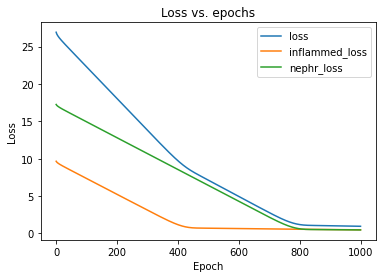

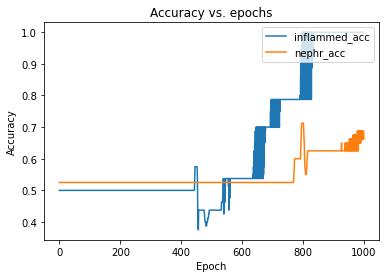

In [17]:
# Plot the training accuracy

acc_keys = [k for k in history.history.keys() if k in ('inflammed_acc', 'nephr_acc')] 
loss_keys = [k for k in history.history.keys() if not k in acc_keys]

for k, v in history.history.items():
    if k in acc_keys:
        plt.figure(1)
        plt.plot(v)
    else:
        plt.figure(2)
        plt.plot(v)

plt.figure(1)
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(acc_keys, loc='upper right')

plt.figure(2)
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loss_keys, loc='upper right')

plt.show()

In [18]:
# Evaluate the model

model.evaluate([temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test],
              [inflam_test, nephr_test])

40/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.861520254611969, 0.43142188, 0.3942234, 1.0, 0.75]

***
<a id="coding_tutorial_2"></a>
## Tensors and Variables

In [ ]:
import numpy as np

#### Create Variable objects

In [19]:
# Create Variable objects of different type with tf.Variable

strings = tf.Variable(["Hello world!"], tf.string)
floats  = tf.Variable([3.14159, 2.71828], tf.float64)
ints = tf.Variable([1, 2, 3], tf.int32)
complexs = tf.Variable([25.9 - 7.39j, 1.23 - 4.91j], tf.complex128)

In [20]:
# Initialise a Variable value

tf.Variable(tf.constant([[1,2],[3,4]]))
tf.Variable(tf.constant(4.2, shape = (2,3,5)))

<tf.Variable 'Variable:0' shape=(2, 3, 5) dtype=float32, numpy=
array([[[4.2, 4.2, 4.2, 4.2, 4.2],
        [4.2, 4.2, 4.2, 4.2, 4.2],
        [4.2, 4.2, 4.2, 4.2, 4.2]],

       [[4.2, 4.2, 4.2, 4.2, 4.2],
        [4.2, 4.2, 4.2, 4.2, 4.2],
        [4.2, 4.2, 4.2, 4.2, 4.2]]], dtype=float32)>

#### Use and modify Variable values

In [21]:
# Use the value of a Variable

v = tf.Variable(0.0)
w = v + 1  # w is a tf.Tensor which is computed based on the value of v.

print(type(w))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [22]:
# Increment the value of a Variable

v.assign_add(1.0)
print(v)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>


In [23]:
# Decrement the value of a Variable

v.assign_sub(1.0)
print(v)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>


#### Create Tensor objects

Create a constant tensor and print its type as well as its shape:

In [24]:
# Create a constant Tensor

x = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x)
print("dtype:", x.dtype)
print("shape:", x.shape)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
dtype: <dtype: 'int32'>
shape: (3, 3)


In [26]:
# Obtain the value as a numpy array

x.numpy()

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [27]:
# Create a Tensor of type float32

tf.constant(np.arange(16), shape = [4,4], dtype = 'float32')

<tf.Tensor: id=15655, shape=(4, 4), dtype=float32, numpy=
array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.]], dtype=float32)>

In [28]:
# Create coefficients

coeffs = np.arange(16)

In [29]:
# Initialise shapes

shape1 = [8,2]
shape2 = [4,4]
shape3 = [2,2,2,2]

In [30]:
# Create Tensors of different shape

a = tf.constant(coeffs, shape=shape1)
print("\n a:\n ", a)

b = tf.constant(coeffs, shape=shape2)
print("\n b:\n ", b)

c = tf.constant(coeffs, shape=shape3)
print("\n c:\n ", c)


 a:
  tf.Tensor(
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]], shape=(8, 2), dtype=int32)

 b:
  tf.Tensor(
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]], shape=(4, 4), dtype=int32)

 c:
  tf.Tensor(
[[[[ 0  1]
   [ 2  3]]

  [[ 4  5]
   [ 6  7]]]


 [[[ 8  9]
   [10 11]]

  [[12 13]
   [14 15]]]], shape=(2, 2, 2, 2), dtype=int32)


#### Useful Tensor operations

In [31]:
# Create a constant Tensor

t = tf.constant(np.arange(80), shape=[5,2,8])

In [33]:
# Get the rank of a Tensor

rank = tf.rank(t)

In [34]:
# Display the rank

print("rank: ", rank)

rank:  tf.Tensor(3, shape=(), dtype=int32)


In [36]:
# Reshape a Tensor

t2 = tf.reshape(t, shape = [8,10])

In [37]:
# Display the new shape

print("t2.shape: ", t2.shape)

t2.shape:  (8, 10)


In [38]:
# Create ones, zeros, identity and constant Tensors

ones = tf.ones(shape = [2,2])
zeros = tf.zeros(shape = [3,2])
eye = tf.eye(3)
tensor7 = tf.constant(7, shape = [3,3])

In [39]:
# Display the created tensors

print("\n Ones:\n ", ones)
print("\n Zeros:\n ", zeros)
print("\n Identity:\n ", eye)
print("\n Tensor filled with 7: ", tensor7)


 Ones:
  tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)

 Zeros:
  tf.Tensor(
[[0. 0.]
 [0. 0.]
 [0. 0.]], shape=(3, 2), dtype=float32)

 Identity:
  tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)

 Tensor filled with 7:  tf.Tensor(
[[7 7 7]
 [7 7 7]
 [7 7 7]], shape=(3, 3), dtype=int32)


In [43]:
# Create a ones Tensor and a zeros Tensor

t1 = tf.ones(shape=(2, 2))
t2 = tf.zeros(shape=(2, 2))

print(t1)
print(t2)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0. 0.]
 [0. 0.]], shape=(2, 2), dtype=float32)


In [41]:
# Concatentate two Tensors

concat0 = tf.concat([t1,t2],0)
concat1 = tf.concat([t1,t2],1)

In [42]:
# Display the concatenated tensors

print(concat0)
print(concat1)

tf.Tensor(
[[1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]], shape=(4, 2), dtype=float32)
tf.Tensor(
[[1. 1. 0. 0.]
 [1. 1. 0. 0.]], shape=(2, 4), dtype=float32)


In [44]:
# Create a constant Tensor

t = tf.constant(np.arange(24), shape=(3, 2, 4))
print("\n t shape: ", t.shape)


 t shape:  (3, 2, 4)


In [56]:
# Expanding the rank of Tensors

t1 = tf.expand_dims(t, axis = 0)
t2 = tf.expand_dims(t, axis = 1)
t3 = tf.expand_dims(t, axis = 3)

In [57]:
# Display the shapes after tf.expand_dims

print("\n After expanding dims:\n t1 shape: ", t1.shape, "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)


 After expanding dims:
 t1 shape:  (1, 3, 2, 4) 
 t2 shape:  (3, 1, 2, 4) 
 t3 shape:  (3, 2, 4, 1)


In [58]:
# Squeezing redundant dimensions

t1 = tf.squeeze(t1, axis = 0)
t2 = tf.squeeze(t2, axis = 1)
t3 = tf.squeeze(t3, axis = 3)

In [59]:
# Display the shapes after tf.squeeze

print("\n After squeezing:\n t1 shape: ", t1.shape, "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)


 After squeezing:
 t1 shape:  (3, 2, 4) 
 t2 shape:  (3, 2, 4) 
 t3 shape:  (3, 2, 4)


In [62]:
# Slicing a Tensor

x = tf.constant(np.arange(7))
x[2:6]

<tf.Tensor: id=15738, shape=(4,), dtype=int32, numpy=array([2, 3, 4, 5])>

#### Doing maths with Tensors

In [63]:
# Create two constant Tensors

c = tf.constant([[1.0, 2.0], [3.0, 4.0]])
d = tf.constant([[1.0, 1.0], [0.0, 1.0]])

In [64]:
# Matrix multiplication

matmul_cd = tf.matmul(c,d)

In [65]:
# Display the result

print("\n tf.matmul(c,d):\n", matmul_cd)


 tf.matmul(c,d):
 tf.Tensor(
[[1. 3.]
 [3. 7.]], shape=(2, 2), dtype=float32)


In [66]:
# Elementwise operations

c_times_d = c*d
c_plus_d = c+d
c_minus_d = c-d
c_div_c = c/d

In [67]:
# Display the results

print("\n c*d:\n", c_times_d)
print("\n c+d:\n", c_plus_d)
print("\n c-d:\n", c_minus_d)
print("\n c/c:\n", c_div_c)


 c*d:
 tf.Tensor(
[[1. 2.]
 [0. 4.]], shape=(2, 2), dtype=float32)

 c+d:
 tf.Tensor(
[[2. 3.]
 [3. 5.]], shape=(2, 2), dtype=float32)

 c-d:
 tf.Tensor(
[[0. 1.]
 [3. 3.]], shape=(2, 2), dtype=float32)

 c/c:
 tf.Tensor(
[[ 1.  2.]
 [inf  4.]], shape=(2, 2), dtype=float32)


In [68]:
# Create Tensors

a = tf.constant([[2, 3], [3, 3]])
b = tf.constant([[8, 7], [2, 3]])
x = tf.constant([[-6.89 + 1.78j], [-2.54 + 2.15j]])

In [69]:
# Absolute value of a Tensor

absx = tf.abs(x)

In [70]:
# Power of a Tensor

powab = tf.pow(a,b)

In [71]:
# Display the results

print("\n ", absx)
print("\n ", powab)


  tf.Tensor(
[[7.11621388]
 [3.32777704]], shape=(2, 1), dtype=float64)

  tf.Tensor(
[[ 256 2187]
 [   9   27]], shape=(2, 2), dtype=int32)


#### Randomly sampled constant tensors

In [79]:
# Create a Tensor with samples from a Normal distribution

tn = tf.random.normal(shape = [2,2], mean = 0, stddev = 1)
print(tn)

tf.Tensor(
[[ 0.06617716 -1.8780198 ]
 [-1.3645391   0.06134219]], shape=(2, 2), dtype=float32)


In [80]:
# Create a Tensor with samples from a Uniform distribution

tu = tf.random.uniform(shape = [2,3], minval = 0.0, maxval = 10)
print(tu)

tf.Tensor(
[[7.4492574 3.561685  5.790837 ]
 [4.607025  6.1634135 5.315813 ]], shape=(2, 3), dtype=float32)


In [81]:
# Create a Tensor with samples from a Poisson distribution

tp = tf.random.poisson(shape = [4,5], lam = 10)
print(tp)

tf.Tensor(
[[ 8.  9. 12.  9.  7.]
 [10. 14. 14. 15.  9.]
 [13. 14.  8. 11.  7.]
 [ 5. 11.  8. 12. 10.]], shape=(4, 5), dtype=float32)


In [82]:
# More maths operations

d = tf.square(tn)
e = tf.exp(d)
f = tf.cos(c)

***
<a id="coding_tutorial_3"></a>
## Accessing model layers

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the pre-trained model

In this section, we aim to demonstrate accessing layer attributes within a model.

Let's get started by loading the `VGG19` pre-trained model from the `keras.applications` library, which is a very deep network trained on more than a million images from the ImageNet database. The network is trained to classify images into 1000 object categories.

In [7]:
# Load the VGG19 model

from tensorflow.keras.applications import VGG19
vgg_model = VGG19()

574717952/574710816 [==============================] - 28s 0us/step


In [8]:
vgg_model.save('./models/Vgg19.h5')

In [158]:
from tensorflow.keras.models import load_model

vgg_model = load_model('./models/Vgg19.h5')

In [159]:
# Get the inputs, layers and display the summary

vgg_input = vgg_model.input
vgg_layers = vgg_model.layers
vgg_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

#### Build a model to access the layer outputs

In [12]:
from tensorflow.keras.models import Model, load_model

In [14]:
# Build a model that returns the layer outputs

layer_outputs = [layer.output for layer in vgg_layers]
features = Model(inputs = vgg_input, outputs = layer_outputs)

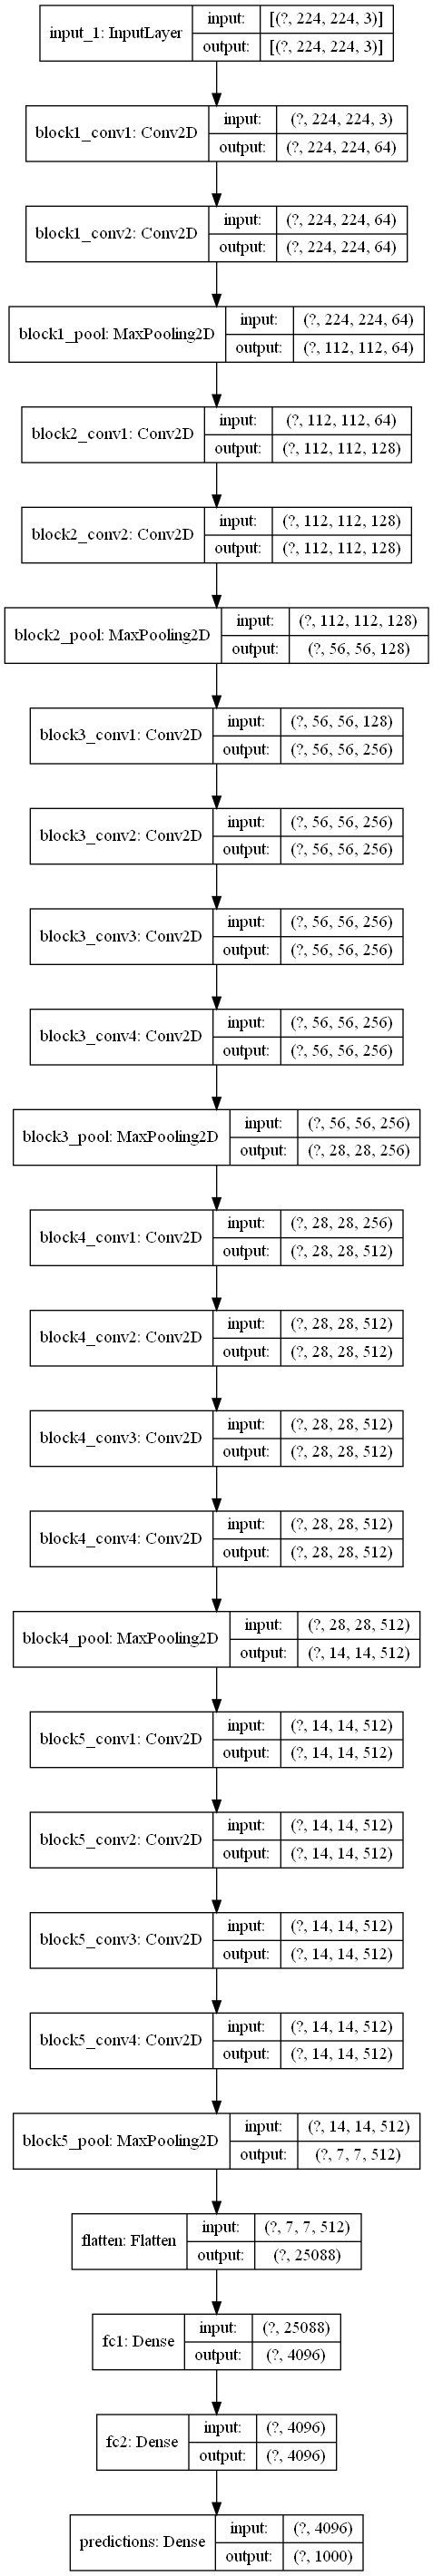

In [16]:
# Plot the model

tf.keras.utils.plot_model(features, 'vgg_model.png', show_shapes = True)

In [18]:
# Test the model on a random input

img = np.random.random((1,244,244,3)).astype('float32')
extracted_features = features(img)

#### Load the 'cool cat' picture

In Zambia’s South Luangwa National Park, a photographer had been watching a pride of lions while they slept off a feast from a buffalo kill. When this female walked away, he anticipated that she might be going for a drink and so he positioned his vehicle on the opposite side of the waterhole. The `cool cat` picture is one of the highly commended 2018 Image from Wildlife Photographer of the Year.

#### Import the picture

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1myXpP8QFvhATqg0bPYhCpVS48_OgAC0L

You should store this file in Drive for use in this Colab notebook.

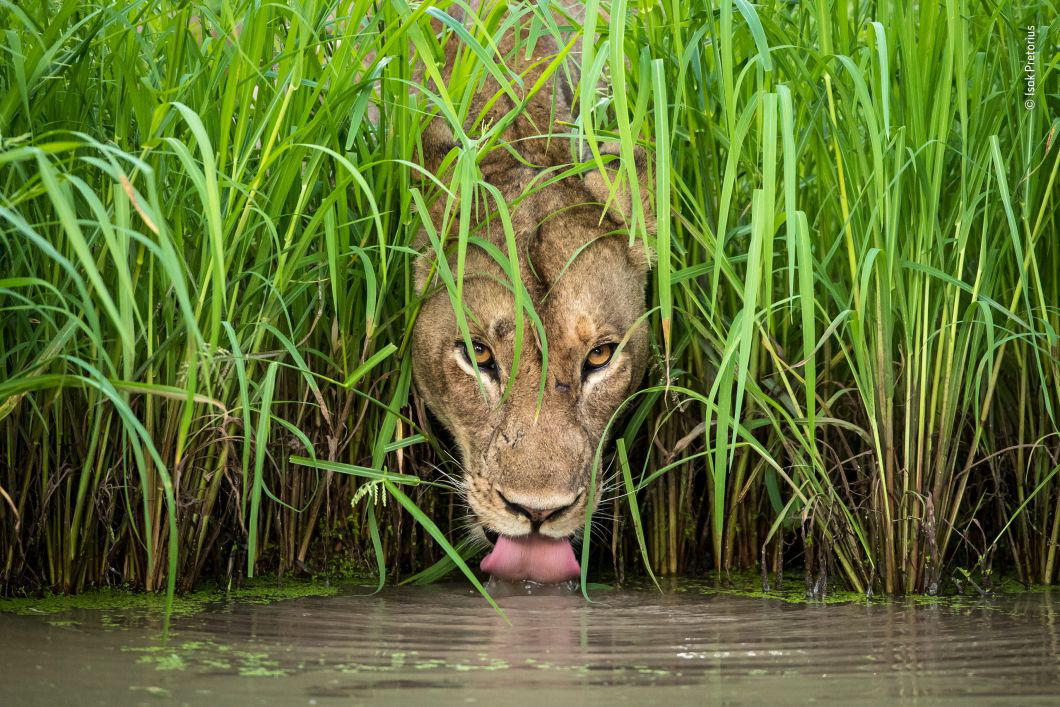

In [20]:
# Display the original image

import IPython.display as display
from PIL import Image

display.display(Image.open('data/cool_cat.jpg'))

#### Visualise network features from the input image

In [21]:
# Preprocess the image

from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image

img_path = 'data/cool_cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [25]:
# Extract the features

extracted_features = features(x)
len(extracted_features)

26

f1.shape (1, 224, 224, 3)


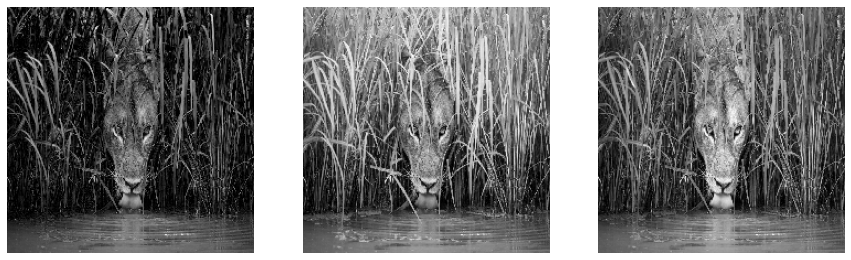

In [29]:
# Visualise the input channels

f1 = extracted_features[0]
print('f1.shape', f1.shape)

imgs = f1[0,:,:]
plt.figure(figsize = (15,15))
for n in range(3):
    ax = plt.subplot(1,3,n+1)
    plt.imshow(imgs[:,:,n], cmap ='gray')
    plt.axis('off')

f1.shape (1, 224, 224, 64)


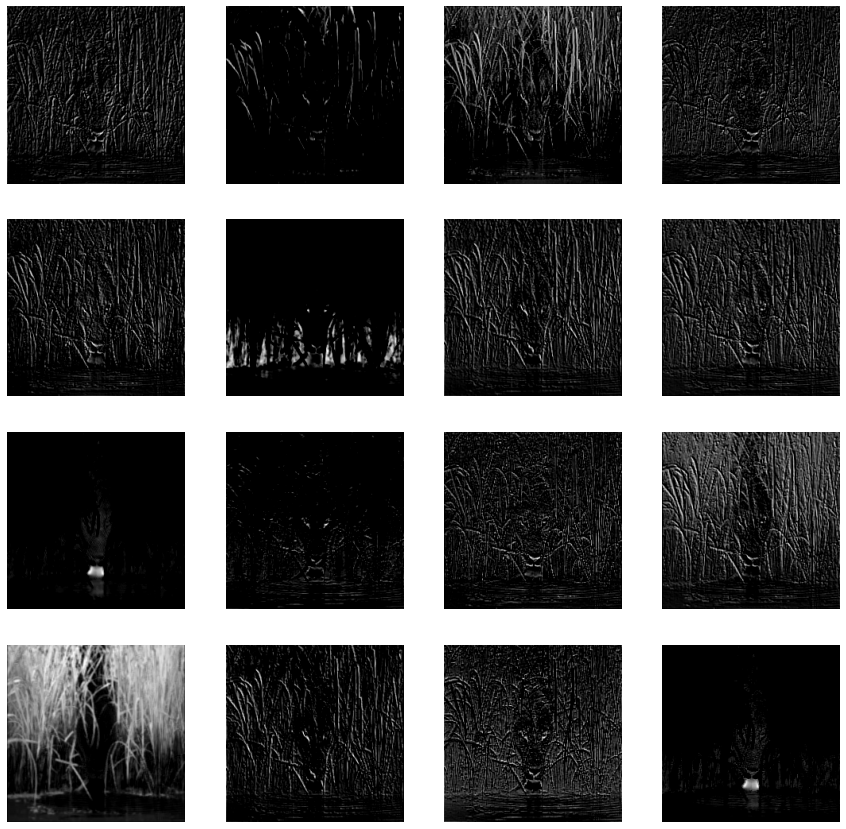

In [30]:
# Visualise some features in the first hidden layer

f1 = extracted_features[1]
print('f1.shape', f1.shape)

imgs = f1[0,:,:]
plt.figure(figsize = (15,15))
for n in range(16):
    ax = plt.subplot(4,4,n+1)
    plt.imshow(imgs[:,:,n], cmap ='gray')
    plt.axis('off')

In [33]:
# Build a model to extract features by layer name
# features = Model(inputs = vgg_input, outputs = layer_outputs)

extracted_features_block1_pooling = Model(inputs = features.input, outputs = features.get_layer('block1_pool').output)
block1_pool_features = extracted_features_block1_pooling.predict(x)

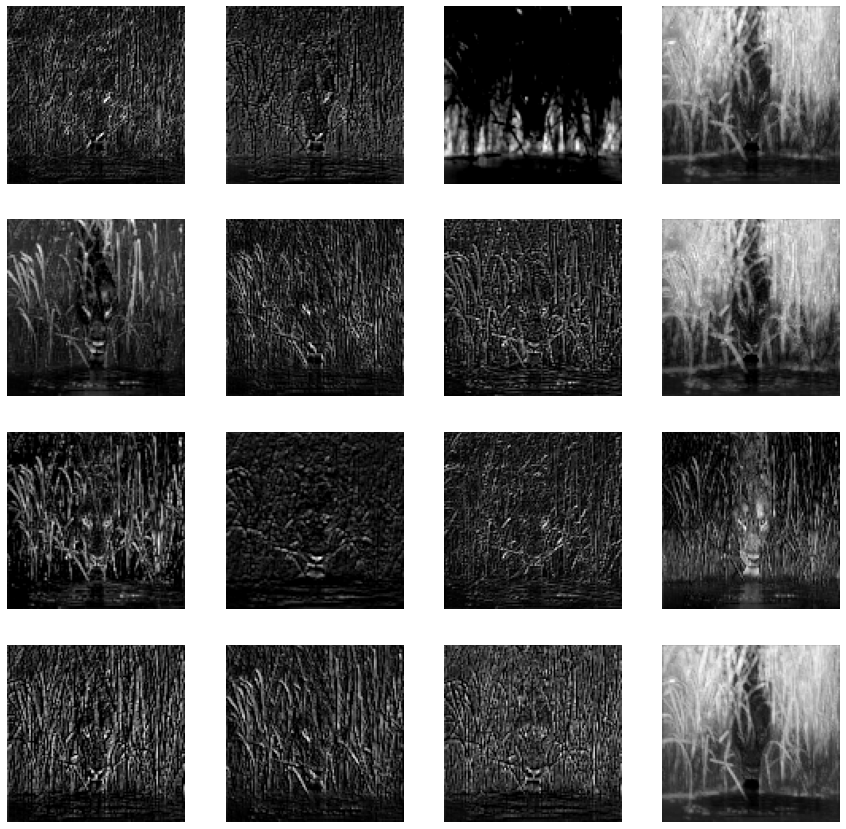

In [35]:
# Visualise some features from the extracted layer output

imgs = block1_pool_features[0,:,:]
plt.figure(figsize = (15,15))
for n in range(16):
    ax = plt.subplot(4,4,n+1)
    plt.imshow(imgs[:,:,n], cmap ='gray')
    plt.axis('off')

In [36]:
# Extract features from a layer deeper in the network

extracted_features_block5_conv4 = Model(inputs = features.input, outputs = features.get_layer('block5_conv4').output)
block5_conv4_features = extracted_features_block5_conv4.predict(x)

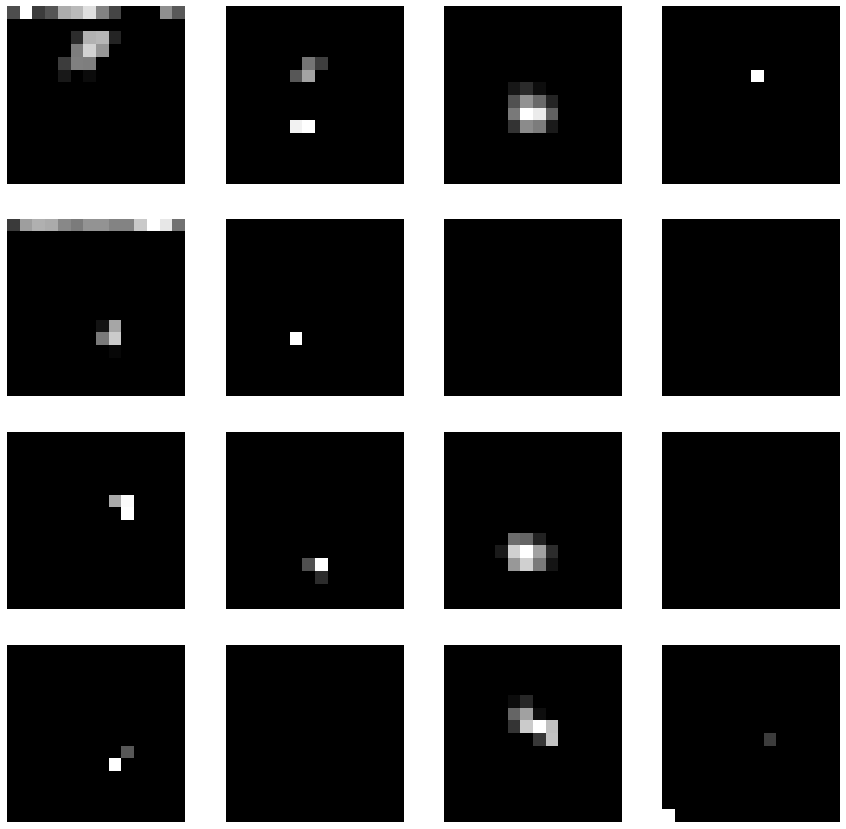

In [37]:
# Visualise some features from the extracted layer output

imgs = block5_conv4_features[0,:,:]
plt.figure(figsize = (15,15))
for n in range(16):
    ax = plt.subplot(4,4,n+1)
    plt.imshow(imgs[:,:,n], cmap ='gray')
    plt.axis('off')


***
<a id="coding_tutorial_4"></a>
## Freezing layers

In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Build the model

In [141]:
# Build a small Sequential model

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones'),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])

In [116]:
# Display the model summary

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 12        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


#### Examine the weight matrix variation over training

In [117]:
def get_weights(model):
    return [e.weights[0].numpy() for e in model.layers]

def get_biases(model):
    return [e.bias[0].numpy() for e in model.layers]

def plot_delta_weights(W1_weights, W0_weights, b1_weights, b0_weights):
    plt.figure(figsize=(8,8))
    for n in range(3):
        delta_l = W1_weights[n] - W0_weights[n]
        print('Layer '+str(n)+': bias variation: ', np.linalg.norm(b1_weights[n] - b0_weights[n]))
        ax = plt.subplot(1,3,n+1)
        plt.imshow(delta_l)
        plt.title('Layer '+str(n))
        plt.axis('off')
    plt.colorbar()
    plt.suptitle('Weight matrices variation')

In [ ]:
W0_layers = [e.weights[0].numpy() for e in model.layers]
b0_layers = [e.bias[0].numpy() for e in model.layers]

In [118]:
# Retrieve the weights and biases

W0_weights = get_weights(model)
b0_weights = get_biases(model)

In [119]:
# Construct a synthetic dataset

x_train = np.random.random((100, 4))
y_train = x_train

x_test = np.random.random((20, 4))
y_test = x_test

In [120]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [121]:
W1_weights = get_weights(model)
b1_weights = get_biases(model)

In [44]:
# Retrieve weights and biases

W1_weights = [e.weights[0].numpy() for e in model.layers]
b1_weights = [e.bias[0].numpy() for e in model.layers]

Layer 0: bias variation:  0.1174016
Layer 1: bias variation:  0.13401693
Layer 2: bias variation:  0.21502925


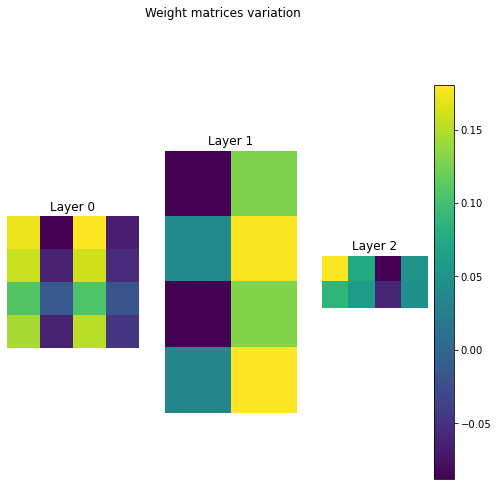

In [122]:
plot_delta_weights(W1_weights, W0_weights, b1_weights, b0_weights)

Layer 0: bias variation:  0.13027072
Layer 1: bias variation:  0.0059655905
Layer 2: bias variation:  0.017876837


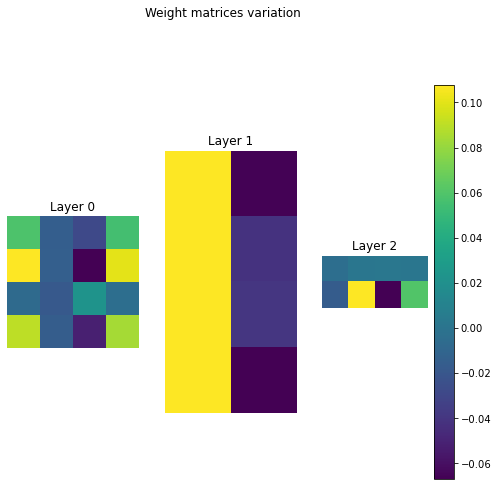

In [46]:
# Plot the variation

plt.figure(figsize=(8,8))
for n in range(3):
    delta_l = W1_weights[n] - W0_weights[n]
    print('Layer '+str(n)+': bias variation: ', np.linalg.norm(b1_weights[n] - b0_weights[n]))
    ax = plt.subplot(1,3,n+1)
    plt.imshow(delta_l)
    plt.title('Layer '+str(n))
    plt.axis('off')
plt.colorbar()
plt.suptitle('Weight matrices variation');

#### Freeze layers at build time

In [142]:
# Count the trainable and non trainable variables before the freezing

n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)

In [143]:
# Display the number of trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)


 Before freezing:
	 Number of trainable variables:  6 
	 Number of non trainable variables:  0


In [144]:
# Build the model

model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones', trainable = False),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])

In [145]:
# Count the trainable and non trainable variables after the freezing

n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)

In [146]:
# Display the number of trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)


 After freezing:
	 Number of trainable variables:  4 
	 Number of non trainable variables:  2


In [147]:
# Retrieve weights and biases

W0_weights = get_weights(model)
b0_weights = get_biases(model)

In [148]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [149]:
# Retrieve weights and biases

W1_weights = get_weights(model)
b1_weights = get_biases(model)

Layer 0: bias variation:  0.0
Layer 1: bias variation:  0.12889606
Layer 2: bias variation:  0.18595345


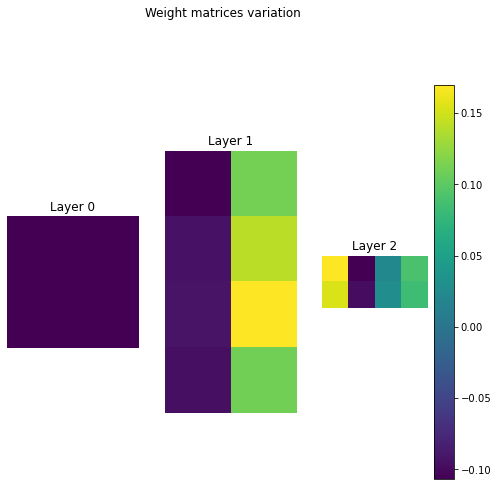

In [150]:
# Plot the variation

plot_delta_weights(W1_weights, W0_weights, b1_weights, b0_weights)

#### Freeze layers of a pre-built model

In [151]:
# Count the trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                         "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))


 Before freezing:
	 Number of trainable variables:  4 
	 Number of non trainable variables:  2


In [152]:
# Freeze the second layer

model.layers[1].trainable = False

In [153]:
# Count the trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                        "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))


 After freezing:
	 Number of trainable variables:  2 
	 Number of non trainable variables:  4


In [154]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [155]:
# Retrieve weights and biases

W2_weights = get_weights(model)
b2_weights = get_biases(model)

Layer 0: bias variation:  0.0
Layer 1: bias variation:  0.0
Layer 2: bias variation:  0.109626636


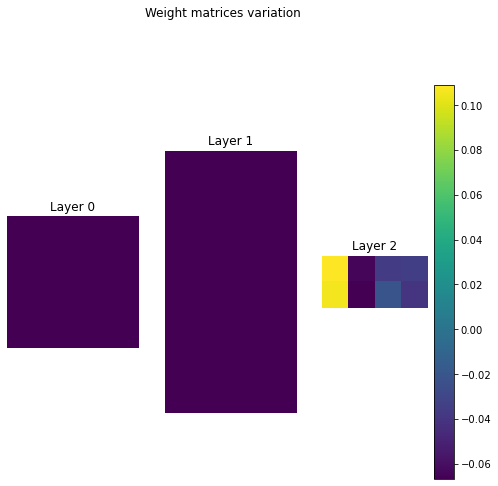

In [157]:
# Plot the variation

plot_delta_weights(W2_weights, W1_weights, b2_weights,  b1_weights)